# Step 2 - Data Wrangling

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

### Load Data

In [2]:
car_data = pd.read_csv('../raw_data/car_price_data.csv')

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
#Call the head method to print the first several rows of the data
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Explore The Data<a id='2.6_Explore_The_Data'></a>

### Filter by make

In [5]:
# each column is a vehicle
car_data[car_data.Make == 'Mazda'].transpose()

,112,113,114,115,116,117,118,119,120,121,...,10836,10837,10838,10839,10840,10841,10842,10843,10844,10845
Make,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,...,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda,Mazda
Model,2,2,2,2,2,2,2,2,2,2,...,Truck,Truck,Truck,Truck,Truck,Truck,Truck,Truck,Truck,Truck
Year,2012,2012,2012,2012,2013,2013,2013,2013,2014,2014,...,2002,2003,2003,2003,2003,2003,2003,2003,2003,2003
Engine Fuel Type,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,...,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded,regular unleaded
Engine HP,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,147.0,207.0,207.0,147.0,147.0,135.0,207.0,147.0,135.0,207.0
Engine Cylinders,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,6.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,4.0,6.0
Transmission Type,MANUAL,MANUAL,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,MANUAL,MANUAL,AUTOMATIC,AUTOMATIC,...,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,...,four wheel drive,four wheel drive,four wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,four wheel drive
Number of Doors,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,2.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0
Market Category,Hatchback,Hatchback,Hatchback,Hatchback,Hatchback,Hatchback,Hatchback,Hatchback,Hatchback,Hatchback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number Of Missing Values By Feature

In [6]:
missing_count = car_data.isnull().sum()
missing_percent = 100 * car_data.isnull().mean()
missing = pd.DataFrame({'Count': missing_count, 'Percentage': missing_percent})
# missing = ski_data([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing_sorted = missing.sort_values(['Count', 'Percentage'], ascending=[False, False])
missing_sorted

,Count,Percentage
Market Category,3742,31.408427
Engine HP,69,0.579151
Engine Cylinders,30,0.251805
Number of Doors,6,0.050361
Engine Fuel Type,3,0.025180
Make,0,0.000000
Model,0,0.000000
Year,0,0.000000
Transmission Type,0,0.000000
Driven_Wheels,0,0.000000


### Impute horsepower data

In [7]:
# Fill missing values for 'Engine HP' with the mean
car_data['Engine HP'].fillna(car_data['Engine HP'].mean(), inplace=True)

In [8]:
# Check for any remaining missing values in the 'Engine HP' column
missing_vals_hp = car_data['Engine HP'].isnull().sum()
if missing_vals_hp == 0:
    print("No more missing values in the 'Engine HP' column.")
else:
    print("There are still", missing_vals_hp, "missing values in the 'Engine HP' column.")

No more missing values in the 'Engine HP' column.


### Exploring Categorical Features

In [9]:
# Select categorical features
car_data.select_dtypes(include=object).head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


In [10]:
# Number of unique makes and models
car_data[['Make', 'Model']].nunique()

Make      48
Model    915
dtype: int64

In [11]:
# Find number of cars of each make
car_data['Make'].value_counts().head()

Make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: count, dtype: int64

In [12]:
# List market categores
car_data['Market Category'].value_counts().head()

Market Category
Crossover             1110
Flex Fuel              872
Luxury                 855
Luxury,Performance     673
Hatchback              641
Name: count, dtype: int64

### Look for and remove duplicate rows

In [13]:
duplicates = car_data.duplicated(keep=False)

# Filter the DataFrame to show only duplicate rows
duplicate_rows = car_data[duplicates]

# Print the duplicate rows
print(duplicate_rows)

         Make     Model  Year             Engine Fuel Type  Engine HP  \
11        BMW  1 Series  2013  premium unleaded (required)      230.0   
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
17       Audi       100  1992             regular unleaded      172.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11707  Suzuki       XL7  2008             regular unleaded      252.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11709  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11                  6.0            MANUAL 

In [14]:
car_data_clean = car_data.drop_duplicates(keep='first')
print("Data after removing duplicates retains", car_data_clean.shape[0], "rows from", car_data.shape[0], "original rows.")

Data after removing duplicates retains 11199 rows from 11914 original rows.


In [15]:
car_data = car_data_clean

### Make and Year distributions

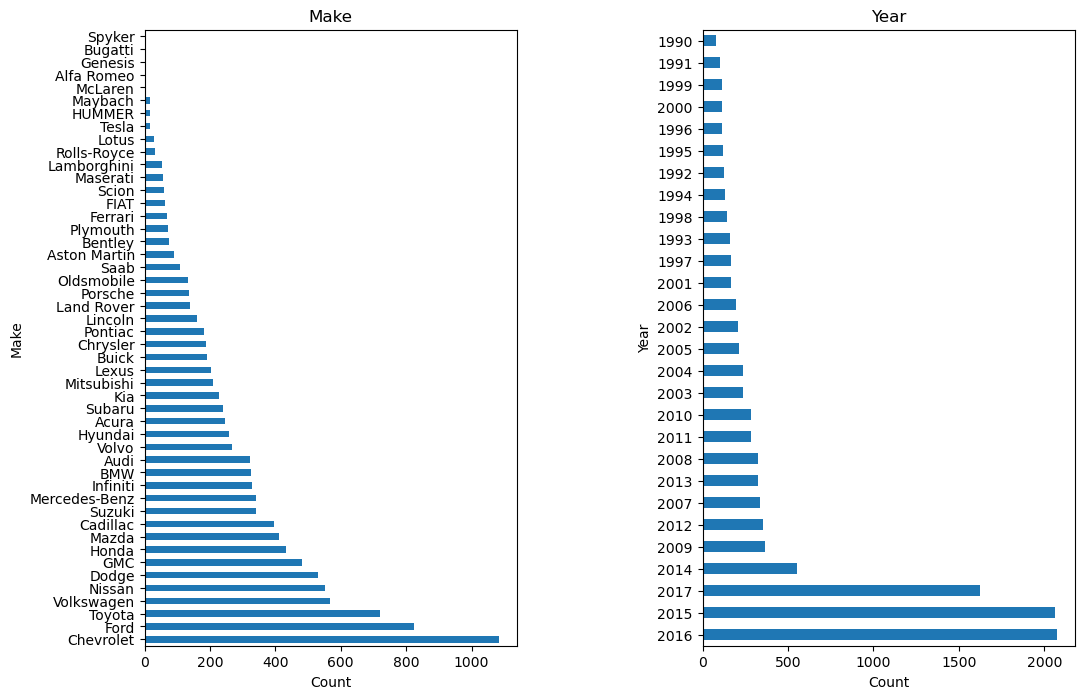

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
car_data.Make.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Make')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
car_data.Year.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('Year')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5)

### Numeric data summary

In [17]:
# Summary of numeric data
car_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,11199.0,2010.714528,7.228211,1990.0,2007.0,2015.0,2016.0,2017.0
Engine HP,11199.0,253.364197,109.811495,55.0,172.0,240.0,303.0,1001.0
Engine Cylinders,11169.0,5.665950,1.797021,0.0,4.0,6.0,6.0,16.0
Number of Doors,11193.0,3.454123,0.872946,2.0,2.0,4.0,4.0,4.0
highway MPG,11199.0,26.610590,8.977641,12.0,22.0,25.0,30.0,354.0
city mpg,11199.0,19.731851,9.177555,7.0,16.0,18.0,22.0,137.0
Popularity,11199.0,1558.483347,1445.668872,2.0,549.0,1385.0,2009.0,5657.0
MSRP,11199.0,41925.927136,61535.047817,2000.0,21599.5,30675.0,43032.5,2065902.0


### Distributions Of Feature Values

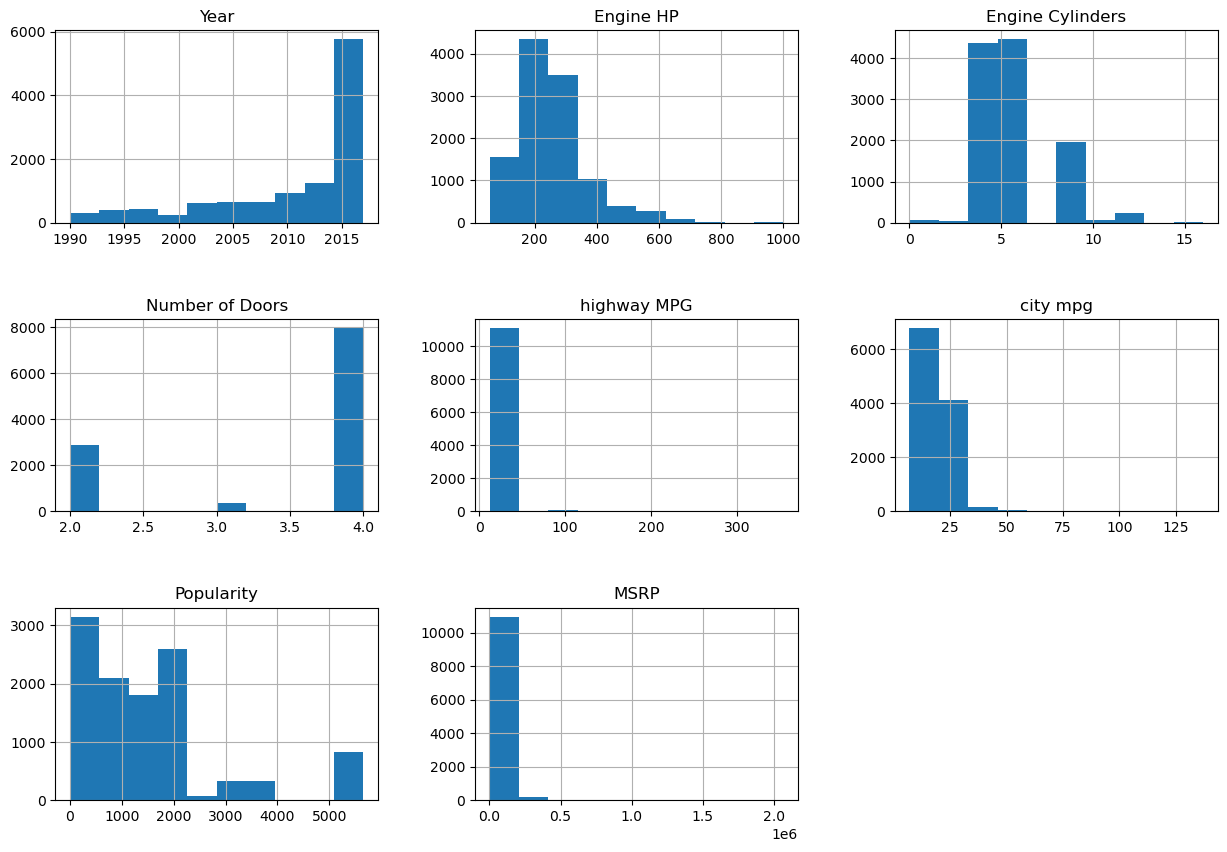

In [18]:
car_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### MSRP

In [19]:
# How many cars is 1% of the data?
total_cars = len(car_data['MSRP'])
print(total_cars * 0.03)

335.96999999999997


In [20]:
# Number of cars worth more than $500,000
msrp_outliers = len(car_data[car_data.MSRP > 200000])
print(msrp_outliers)

278


In [21]:
# Ok, I can stand to get rid of less than 3% to remove outliers
max_msrp_before = car_data['MSRP'].max()
print("Maximum MSRP before filtering: $", max_msrp_before)

Maximum MSRP before filtering: $ 2065902


In [22]:
# Remove those outlier values to make distribution more normal
filtered_car_data = car_data[car_data.MSRP <= 200000]

In [23]:
# Check the maximum 'MSRP' in the filtered DataFrame
max_msrp = filtered_car_data['MSRP'].max()
print("Maximum MSRP after filtering: $", max_msrp)

Maximum MSRP after filtering: $ 199900


In [24]:
car_data = filtered_car_data

Text(0, 0.5, 'Count')

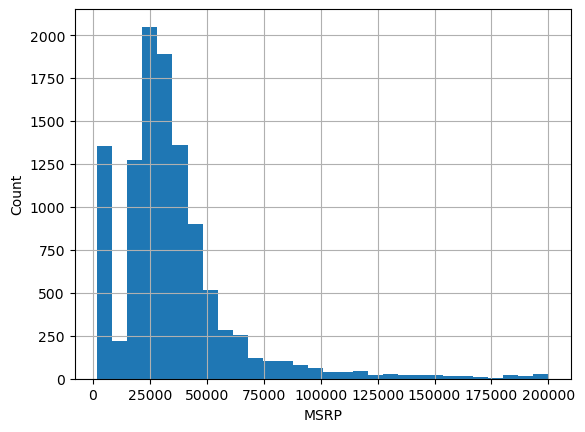

In [25]:
# Plot new distribution of MSRP. Looks better now
car_data.MSRP.hist(bins=30)
plt.xlabel('MSRP')
plt.ylabel('Count')

### Number of Doors
Should there be vehicles with 3 doors?

In [26]:
two = car_data[car_data['Number of Doors'] == 2]
three = car_data[car_data['Number of Doors'] == 3]
four = car_data[car_data['Number of Doors'] == 4]

In [27]:
len(three)

356

Let's see what types of vehicles have 3 doors in order to decide whether to keep or impute.

In [28]:
three['Vehicle Size'].value_counts()

Vehicle Size
Midsize    138
Large      131
Compact     87
Name: count, dtype: int64

In [29]:
three['Vehicle Style'].value_counts()

Vehicle Style
Passenger Van          121
Cargo Van               84
Passenger Minivan       63
Extended Cab Pickup     47
Cargo Minivan           23
2dr Hatchback           18
Name: count, dtype: int64

In [30]:
three['Market Category'].value_counts()

Market Category
Flex Fuel                115
Flex Fuel,Diesel          16
Diesel                    14
Hatchback,Performance     10
Hatchback                  8
Performance                2
Luxury                     1
Name: count, dtype: int64

356 out of 11,199 vehicles have 3 doors. The vehicle style of 3 doored vehicles consists of vans, pickups and hatchbacks. That means the 3rd door was intentional and so I will leave it in the data.

### Highway / City MPG

In [31]:
len(car_data['highway MPG'])

10921

In [32]:
# View rows where highway MPG is greater than 100
car_data[car_data['highway MPG'] > 100].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1119,Audi,A6,2017,premium unleaded (recommended),252.00000,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
1983,Chevrolet,Bolt EV,2017,electric,200.00000,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905


Above we can see the vehicles with mpg in the hundreds are electric.

In [33]:
car_data[car_data['highway MPG'] > 200].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


The one vehicle with 354 highway MPG is clearly a typo. I'll remove it below.

In [34]:
car_data = car_data[car_data['highway MPG'] != 354]

# Check if any rows still contain 'highway MPG' equal to 354
if (car_data['highway MPG'] == 354).any():
    print("Some rows with 'highway MPG' equal to 354 still exist.")
else:
    print("Row with 'highway MPG' equal to 354 has been removed.")

Row with 'highway MPG' equal to 354 has been removed.


There are two distributions in the Highway MPG and City MPG columns. These represent gas vehicles and electric vehicles. Separating both colums by vehicle type makes sense because they are different measurements. 

In [35]:
len(car_data)

10920

In [36]:
car_data['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                                6658
premium unleaded (required)                     1698
premium unleaded (recommended)                  1391
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         33
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

In [37]:
# Create highway MPG columns for Gas and Electric
car_data.loc[:, 'Highway MPG Gas'] = np.where(car_data['highway MPG'] <= 65, car_data['highway MPG'], np.nan)
car_data.loc[:, 'Highway MPG Electric'] = np.where(car_data['highway MPG'] > 65, car_data['highway MPG'], np.nan)

# Create city MPG columns for Gas and Electric
car_data.loc[:, 'City MPG Gas'] = np.where(car_data['city mpg'] <= 65, car_data['city mpg'], np.nan)
car_data.loc[:, 'City MPG Electric'] = np.where(car_data['city mpg'] > 65, car_data['city mpg'], np.nan)

C:\Users\ekiff\AppData\Local\Temp\ipykernel_15812\3781274583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.loc[:, 'Highway MPG Gas'] = np.where(car_data['highway MPG'] <= 65, car_data['highway MPG'], np.nan)
C:\Users\ekiff\AppData\Local\Temp\ipykernel_15812\3781274583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.loc[:, 'Highway MPG Electric'] = np.where(car_data['highway MPG'] > 65, car_data['highway MPG'], np.nan)
C:\Users\ekiff\AppData\Local\Temp\ipykernel_15812\3781274583.p

In [38]:
# Drop the original MPG columns
car_data = car_data.drop(['highway MPG', 'city mpg'], axis=1)

In [39]:
# Double check that the vehicles that get great gas mileage (outliers) in the City MPG Gas column are not electric. We found hybrids.
car_data[car_data['City MPG Gas'] > 50].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Popularity,MSRP,Highway MPG Gas,Highway MPG Electric,City MPG Gas,City MPG Electric
7663,Toyota,Prius c,2014,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,2031,20030,46.0,NaN,53.0,NaN
7664,Toyota,Prius c,2014,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,2031,19080,46.0,NaN,53.0,NaN
7665,Toyota,Prius c,2014,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,2031,21765,46.0,NaN,53.0,NaN
7666,Toyota,Prius c,2014,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,2031,23360,46.0,NaN,53.0,NaN
7667,Toyota,Prius c,2015,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,2031,20340,46.0,NaN,53.0,NaN


### Popularity
This column has no units and will not impact the pricing model so I will remove it.

In [40]:
car_data = car_data.drop(['Popularity'], axis=1)

### Cylinders

In [41]:
# Electric cars have 0 cylinders
car_data[car_data['Engine Cylinders'] == 0].head()
# Should I change the 0 to nan?

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MSRP,Highway MPG Gas,Highway MPG Electric,City MPG Gas,City MPG Electric
539,FIAT,500e,2015,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,31800,NaN,108.0,NaN,122.0
540,FIAT,500e,2016,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,31800,NaN,103.0,NaN,121.0
541,FIAT,500e,2017,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,31800,NaN,103.0,NaN,121.0
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.00000,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,41450,NaN,82.0,NaN,85.0
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.00000,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,41450,NaN,82.0,NaN,85.0


All other number of cylinders in the data are valid. 

# Check distributions again

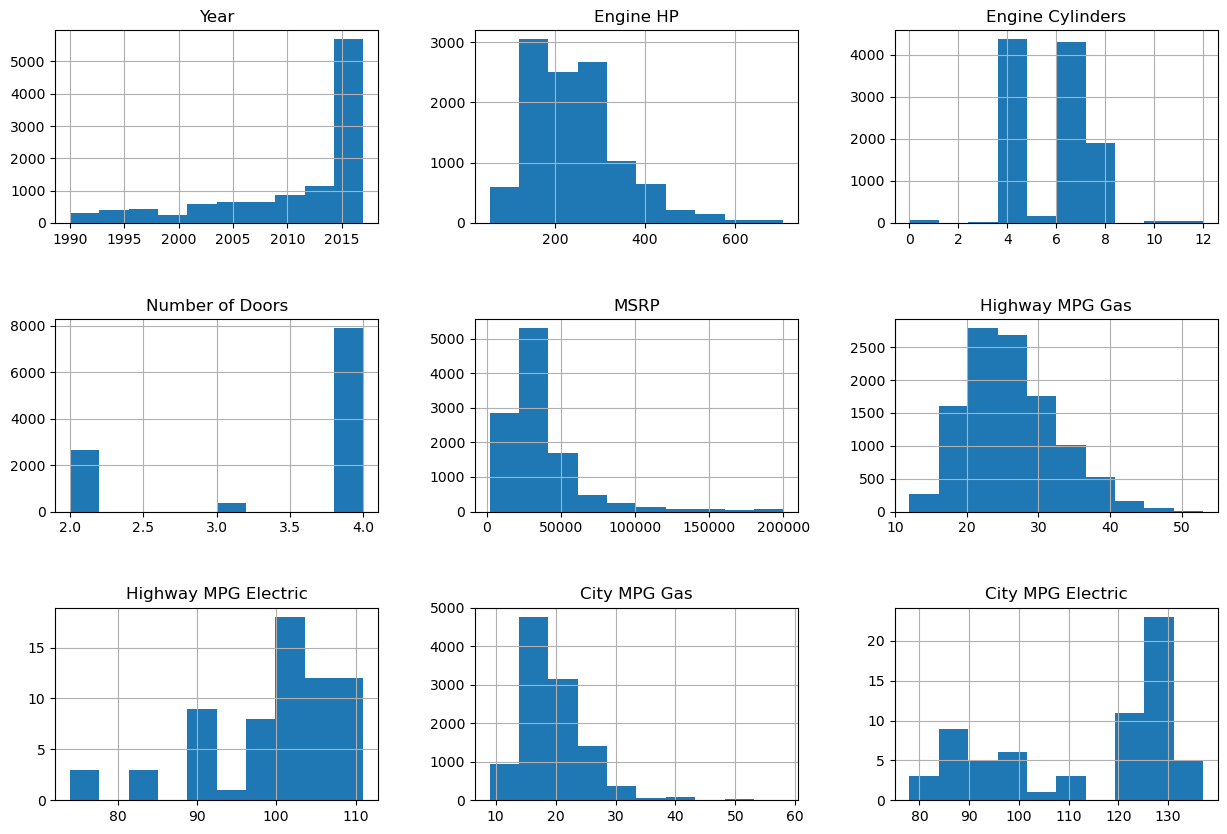

In [42]:
car_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Looks better! All these distributions are plausible and represent the vehices accuratley.

## Save data

In [43]:
car_data.shape

(10920, 17)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [44]:
# save the data to a new csv file
datapath = '../data'
save_file(car_data, 'car_data_cleaned.csv', datapath)

Writing file.  "../data\car_data_cleaned.csv"
